In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd


In [6]:
# Enable the cache
ff1.Cache.enable_cache('C:/Users/aviha/Desktop/f1_data_project/2021 Abu Dhabi GP Minisector Comparison/cache')

# Setup plotting
plotting.setup_mpl()

c:\Users\aviha\anaconda3\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\aviha\anaconda3\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


# Collecting the data

In [23]:
# Load the session data
quali = ff1.get_session(2021, 'Abu Dhabi', 'Q')

# Load all available data for the session
quali.load()

# Now, access the laps data
laps = quali.laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 22: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 18: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for

In [45]:
print('all the available methods and attributes of the quali object: ')
list_of_methods = dir(quali)
private_methods = []
public_methods = []
for method in list_of_methods:
    if method[0] == '_':
        private_methods.append(method)
    else :
        public_methods.append(method)
print('=> private methods :')
print(private_methods)
print('=> public methods :')
print(public_methods)

all the available methods and attributes of the quali object: 
=> private methods :
['_QUALI_LIKE_SESSIONS', '_RACE_LIKE_SESSIONS', '_Session__fix_tyre_info', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_first_lap_time_from_ergast', '_add_track_status_to_laps', '_calculate_quali_like_session_results', '_calculate_t0_date', '_car_data', '_check_lap_accuracy', '_drivers_from_f1_api', '_drivers_results_from_ergast', '_ergast', '_fix_missing_laps_retired_on_track', '_get_property_warn_not_loaded', '_laps', '_load_drivers_results', '_load_laps_data', '_load_race_control_messages', '_load_session_info', '_load_session_status_data', '_load_telemetry', '_load_total_lap_count', '

In [31]:
print(laps.columns)
print(laps.shape)
print(laps.size)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')
(328, 31)
10168


In [42]:
print(str(len(laps['Driver'].unique())) + ' Drivers:')
print(laps['Driver'].unique())
print('\n')
print(str(len(laps['Team'].unique())) + ' Teams:')
print(laps['Team'].unique())

20 Drivers:
['VER' 'HAM' 'NOR' 'PER' 'SAI' 'BOT' 'LEC' 'TSU' 'OCO' 'RIC' 'ALO' 'GAS'
 'STR' 'GIO' 'VET' 'LAT' 'RUS' 'RAI' 'MSC' 'MAZ']


10 Teams:
['Red Bull Racing' 'Mercedes' 'McLaren' 'Ferrari' 'AlphaTauri' 'Alpine'
 'Aston Martin' 'Alfa Romeo Racing' 'Williams' 'Haas F1 Team']


# Processing the data

In [67]:
# Select the laps from hamilton and Verstappen
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')
print('laps_ver.shape : ' + str(laps_ver.shape))
print(str(len(laps_ver.columns)) + ' laps_ver.columns : ' + '\n' + str(laps_ver.columns))
print('\n')

# Get the telemetry data from their fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Since the telemetry data does not have a variable that indicates the driver,
# we neet to create that column
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'
print('\n')
print('fastest_ver.shape : ' + str(fastest_ver.shape))
print(str(len(fastest_ver.columns)) + ' fastest_ver.columns : ' + '\n' + str(fastest_ver.columns))
print('\n')

# Merge both lap telemetry so we have everything in one Dataframe
telemetry = pd.concat([fastest_ver, fastest_ham], ignore_index=True)
print(telemetry['Driver'].unique())
print('telemetry.shape : ' + str(telemetry.shape))
print(str(len(telemetry.columns)) + ' telemetry.columns : ' + '\n' + str(telemetry.columns))

laps_ver.shape : (19, 31)
31 laps_ver.columns : 
Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')




core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.




fastest_ver.shape : (719, 19)
19 fastest_ver.columns : 
Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance', 'Driver'],
      dtype='object')


['VER' 'HAM']
telemetry.shape : (1439, 19)
19 telemetry.columns : 
Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance', 'Driver'],
      dtype='object')


## Creating minisectors

In [69]:
# We want 25 mini sectors (this can be adjusted up and down)
num_minisector = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = max(telemetry['Distance'])
print(total_distance)

# Generate equally sized mini sectors
minisector_length = total_distance / num_minisector
print(minisector_length)

5228.621388888891
209.14485555555564


In [71]:
# Initiate minisector variable, with 0 meters as strating point
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisector - 1)):
    minisectors.append(minisector_length * (i + 1))

print(minisectors)

[0, 209.14485555555564, 418.2897111111113, 627.4345666666669, 836.5794222222225, 1045.7242777777783, 1254.8691333333338, 1464.0139888888893, 1673.158844444445, 1882.3037000000008, 2091.4485555555566, 2300.593411111112, 2509.7382666666676, 2718.8831222222234, 2928.0279777777787, 3137.1728333333344, 3346.31768888889, 3555.462544444446, 3764.6074000000017, 3973.752255555557, 4182.897111111113, 4392.0419666666685, 4601.186822222224, 4810.33167777778, 5019.476533333335]


In [74]:
# we want to assign every row that exists in the dataset a minisector. In other words, in which minisector was the car at the moment the datapoint was recorded?

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

## Calculate fastest driver per mini sector

In [77]:
# Calculate avg speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
print(average_speed)

    Minisector Driver       Speed
0            1    HAM  260.615385
1            1    VER  260.461538
2            2    HAM  233.035714
3            2    VER  236.482759
4            3    HAM  219.600000
5            3    VER  216.766667
6            4    HAM  265.080000
7            4    VER  265.080000
8            5    HAM  279.173913
9            5    VER  279.869565
10           6    HAM  293.652174
11           6    VER  294.869565
12           7    HAM  172.684211
13           7    VER  172.026316
14           8    HAM  199.303030
15           8    VER  198.843750
16           9    HAM  275.826087
17           9    VER  276.458333
18          10    HAM  303.095238
19          10    VER  304.904762
20          11    HAM  314.333333
21          11    VER  317.700000
22          12    HAM  319.428571
23          12    VER  323.761905
24          13    HAM  126.129630
25          13    VER  123.203704
26          14    HAM  204.781250
27          14    VER  202.333333
28          15

In [89]:
# Se;ect the driver with the hightest average speed per minisector
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
print(average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()].head())
print('...')

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})
print('\n')
print(fastest_driver.head())
print('...')

   Minisector Driver       Speed
0           1    HAM  260.615385
3           2    VER  236.482759
4           3    HAM  219.600000
6           4    HAM  265.080000
9           5    VER  279.869565
...


   Minisector Fastest_driver
0           1            HAM
3           2            VER
4           3            HAM
6           4            HAM
9           5            VER
...


In [90]:
'''
The only remaining thing we need to do is to join the fastest driver per minisector with the full telemetry data, so that we can easily plot all the data later. In addition, we need to make sure that the Distance is properly sorted. Last, but not least, we need to convert the driver abbreviation (e.g. “HAM”) to an integer value, since otherwise matplotlib won’t be able to deal with it.
'''

# Join the fastest driver per minisector with the full telemetry
# This merges the telemetry DataFrame with the fastest_driver DataFrame based on the 'Minisector' column
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matplotlib does not get confused
# Sorting the telemetry DataFrame by the 'Distance' column ensures that the data is in the correct order for plotting
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
# Here, we create a new column 'Fastest_driver_int' to hold integer values for each driver
# Assign integer value 1 for driver 'VER' (Verstappen)
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
# Assign integer value 2 for driver 'HAM' (Hamilton)
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

# Plotting the data

C:\Users\aviha\AppData\Local\Temp\ipykernel_44588\1322113706.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('winter', 2)  # Create a colormap with 2 colors


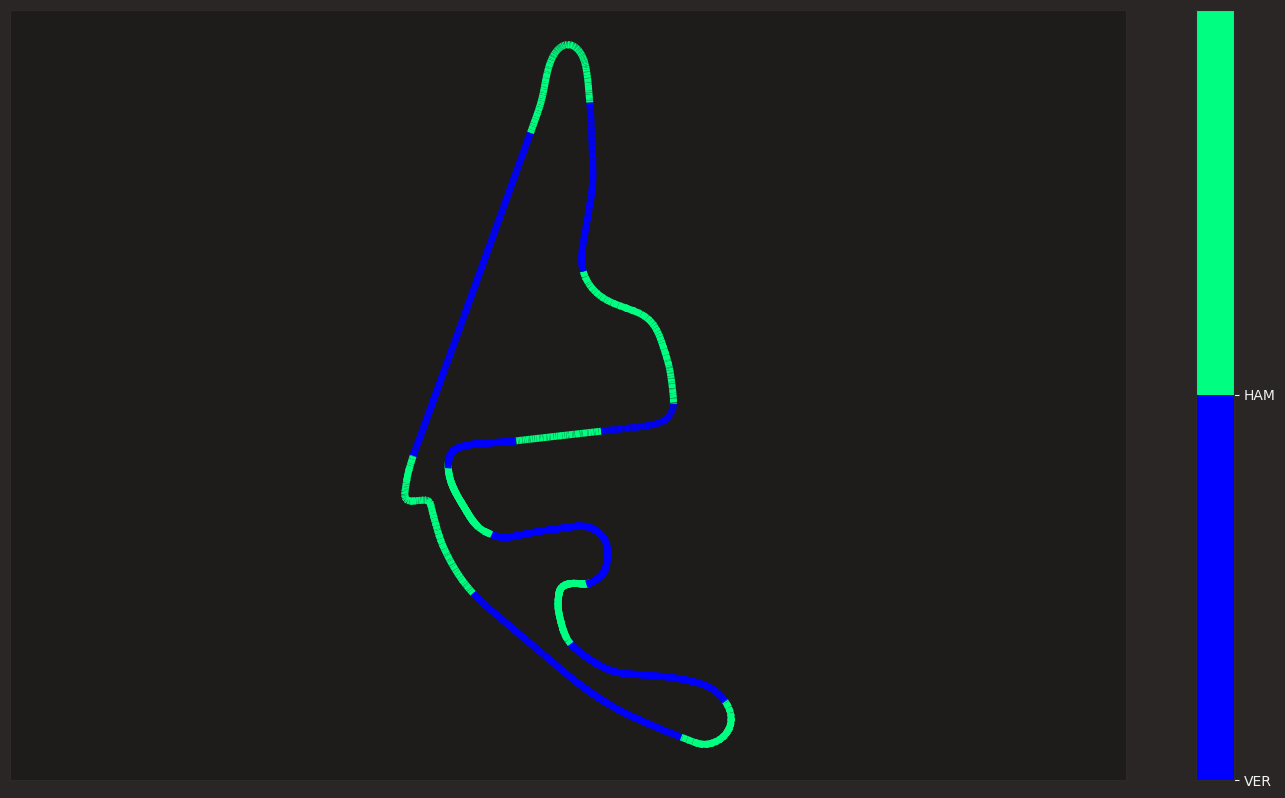

In [101]:
# Convert the 'X' and 'Y' coordinates from the telemetry DataFrame into numpy arrays
x = np.array(telemetry['X'].values)  # Extract X coordinates from telemetry DataFrame
y = np.array(telemetry['Y'].values)  # Extract Y coordinates from telemetry DataFrame

# Combine the x and y arrays into a 2D array of points and reshape it
# The reshape operation prepares the data for creating line segments
# each element i of points will be of the form array([[x_i,y_i]])
points = np.array([x, y]).T.reshape(-1, 1, 2)  # Shape: (n_points, 1, 2) for each point

# Create line segments by combining each point with the next point
# This helps in visualizing the path as a series of connected segments
# each element i in segment will be of the form array([array([x_i,y_i]), array([x_i+1,y_i+1])])
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Shape: (n_segments, 2, 2)

# Convert the 'Fastest_driver_int' column to a float numpy array
# This array will be used to color the segments based on the fastest driver
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

# Create a colormap with 2 distinct colors using the 'winter' colormap
cmap = cm.get_cmap('winter', 2)  # Create a colormap with 2 colors

# Create a LineCollection from the segments, normalizing the color mapping based on the fastest driver
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)

# Set the color array for the LineCollection based on the fastest driver data
lc_comp.set_array(fastest_driver_array)  # Assign colors to each segment based on driver

# Set the width of the lines in the LineCollection
lc_comp.set_linewidth(5)  # Make lines thicker for better visibility

# Set the figure size for the plot
plt.rcParams['figure.figsize'] = [18, 10]  # Define the dimensions of the plot

# Add the LineCollection to the current axes
plt.gca().add_collection(lc_comp)  # Add the line segments to the plot

# Set the aspect of the plot to be equal for proper scaling
plt.axis('equal')  # Ensure that the scaling is equal on both axes

# Hide the tick marks and labels on the left and bottom axes for a cleaner look
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Create a colorbar to indicate which colors correspond to which drivers
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))

# Set the ticks and labels for the colorbar, assuming only 2 drivers
cbar.set_ticks([1, 2])  # Set ticks for 'VER' and 'HAM'
cbar.set_ticklabels(['VER', 'HAM'])  # Corresponding labels for the ticks

# Save the plot as a PNG file with a specified DPI for quality
plt.savefig(f"2021_ver_ham_q.png", dpi=300)  # Save the plot as an image file

# Display the plot
plt.show()  # Show the generated plot to the user
